# Setting

### Note : the file is very large. So i will manage one by one.

In [1]:
#importing some lib and set display table.
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [2]:
# the name of file meaning as below. 
# ac = account ,b = base, st = statement
# tr = Transaction ,ct = Contacting
# b_ac = b join with ac by using 3 AC and B analysis file.
ac_1218 = 'Customer_RL_Account_1218.txt'
ac_0119 = 'Customer_RL_Account_0119.txt'
ac_0219 = 'Customer_RL_Account_0219.txt'
b_1218 = 'Customer_RL_Base_1218.txt'
b_0119 = 'Customer_RL_Base_0119.txt'
b_0219 = 'Customer_RL_Base_0219.txt'
st_1218 = 'Customer_RL_Statement_1218.txt'
st_0119 = 'Customer_RL_Statement_0119.txt'
st_0219 = 'Customer_RL_Statement_0219.txt'
tr_1218 = 'Customer_RL_Transaction_1218.txt'
tr_0119 = 'Customer_RL_Transaction_0119.txt'
tr_0219 = 'Customer_RL_Transaction_0219.txt'
ct_1218 = 'Customer_RL_Contacting_1218.txt'
ct_0119 = 'Customer_RL_Contacting_0119.txt'
ct_0219 = 'Customer_RL_Contacting_0219.txt'
b_ac_1218 = 'b_ac_1218_data.csv'
b_ac_0119 = 'b_ac_0119_data.csv'
b_ac_0219 = 'b_ac_0119_data.csv'

# Statement Exploretion

In [3]:
# Statement 
st_data = pd.read_csv(st_0119,header = 0,sep = '|',encoding="ISO-8859-1")

In [4]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17941464 entries, 0 to 17941463
Data columns (total 6 columns):
CUSTOMER_ID    int64
CARD_NO        int64
Bill_Date      int64
Due_Date       int64
Min_Pay        float64
CyC_Balance    float64
dtypes: float64(2), int64(4)
memory usage: 821.3 MB


In [5]:
# Casting type and fill&drop NAN data.

st_data['CUSTOMER_ID'] = st_data['CUSTOMER_ID'].astype('str')
st_data['CARD_NO'] = st_data['CARD_NO'].astype('str')
st_data['Bill_Date'] = st_data['Bill_Date'].astype('str')
st_data['Due_Date'] = st_data['Due_Date'].astype('str')
st_data['Min_Pay'] = st_data['Min_Pay'].astype('float')
st_data['CyC_Balance'] = st_data['CyC_Balance'].astype('float')

In [6]:
# Total statistic of CyC_balance.
Total_Statistic_mean = st_data['CyC_Balance'].mean()
Total_Statistic_std =  st_data['CyC_Balance'].std()
st_data['CyC_Balance'].to_frame().describe().astype(int)


,CyC_Balance
count,17941464
mean,26624
std,37991
min,-430049
25%,0
50%,12712
75%,40714
max,1935508


In [7]:
# Make std score for CyC_Balance_Min.
# percentile function
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

st_data = st_data.groupby(['CUSTOMER_ID','CARD_NO'], as_index=False).CyC_Balance.agg([np.size,np.min,np.max,np.mean,np.std,percentile(5),percentile(25),percentile(50),percentile(75), percentile(95)]).rename(columns={'size':'CyC_Balance_Size','min':'CyC_Balance_Min','max':'CyC_Balance_Max','mean':'CyC_Balance_Mean','std':'Cyc_Balance_Std'})
st_data = st_data.rename(columns={'size':'CyC_Balance_Size','amin':'CyC_Balance_Min','amax':'CyC_Balance_Max','mean':'CyC_Balance_Mean','std':'Cyc_Balance_Std','percentile_5':'Cyc_Balance_PT_5','percentile_25':'Cyc_Balance_PT_25','percentile_50':'Cyc_Balance_PT_50','percentile_75':'Cyc_Balance_PT_75','percentile_95':'Cyc_Balance_PT_95'})
st_data = st_data.reset_index()

In [8]:
from sklearn.preprocessing import StandardScaler
fit_data = st_data[['CyC_Balance_Min','Cyc_Balance_PT_5','Cyc_Balance_PT_25','Cyc_Balance_PT_50','Cyc_Balance_PT_75','Cyc_Balance_PT_95','CyC_Balance_Max']]
scaler = StandardScaler()
scaler = scaler.fit(fit_data)
print("The mean of standardize::", scaler.mean_)
print("The variance of standardize::", scaler.var_ )

The mean of standardize:: [14033.27810163 15715.80230765 20738.50664145 26118.05425299
 31232.34493141 36012.83180563 37645.82741978]
The variance of standardize:: [6.70659685e+08 7.28074946e+08 9.55902568e+08 1.26833589e+09
 1.59296114e+09 1.89992998e+09 2.00060883e+09]


In [9]:
fit_data = pd.DataFrame(scaler.transform(fit_data))
st_data['CyC_Balance_Min_Score'] = fit_data[0]
st_data['Cyc_Balance_PT_5_Score'] = fit_data[1]
st_data['Cyc_Balance_PT_25_Score'] = fit_data[2]
st_data['Cyc_Balance_PT_50_Score'] = fit_data[3]
st_data['Cyc_Balance_PT_75_Score'] = fit_data[4]
st_data['Cyc_Balance_PT_95_Score'] = fit_data[5]
st_data['Cyc_Balance_PT_Max_Score'] = fit_data[6]

In [10]:
st_data['Cyc_Balance_Mean_Score'] =  st_data[['CyC_Balance_Min_Score','Cyc_Balance_PT_5_Score','Cyc_Balance_PT_25_Score','Cyc_Balance_PT_50_Score','Cyc_Balance_PT_75_Score','Cyc_Balance_PT_95_Score','Cyc_Balance_PT_Max_Score']].mean(axis=1)
st_data['Cyc_Balance_Grade'] =  (100 - ((st_data['Cyc_Balance_Mean_Score'] - st_data['Cyc_Balance_Mean_Score'].min())/(st_data['Cyc_Balance_Mean_Score'].max() - st_data['Cyc_Balance_Mean_Score'].min()))*100)

In [11]:
#marge
b_ac_data = pd.read_csv(b_ac_0119,index_col=0,encoding="utf-8-sig") 
b_ac_data['CUSTOMER_ID'] = b_ac_data['CUSTOMER_ID'].astype('str')
b_ac_data['Account_Number'] = b_ac_data['Account_Number'].astype('str')
b_ac_data = b_ac_data.merge(st_data, left_on=['CUSTOMER_ID'], right_on=['CUSTOMER_ID'], how ='right').sort_values(['CUSTOMER_ID'])

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Cyc_Balance behavier clustering

In [12]:
# Clustring by Cyc_Balance Percentiles
clustering = b_ac_data.copy()
clustering = clustering[['Cyc_Balance_Std','CyC_Balance_Min','Cyc_Balance_PT_5','Cyc_Balance_PT_25','Cyc_Balance_PT_50','Cyc_Balance_PT_75','Cyc_Balance_PT_95','CyC_Balance_Max']]
clustering['Cyc_Balance_Std'] = clustering['Cyc_Balance_Std'].fillna(0)

In [13]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 10).fit(clustering)
labels = kmean.labels_
b_ac_data['Cyc_Balance_Behavier_Group'] = labels
b_ac_data.to_csv("b_ac_st_0119_data.csv", encoding="utf-8-sig")

In [14]:
Centroids = pd.DataFrame(kmean.cluster_centers_, columns = ['Cyc_Balance_Std','CyC_Balance_Min','Cyc_Balance_PT_5','Cyc_Balance_PT_25','Cyc_Balance_PT_50','Cyc_Balance_PT_75','Cyc_Balance_PT_95','CyC_Balance_Max'])


In [15]:
Std_Centroids = Centroids[['Cyc_Balance_Std']]
ploting = Centroids.drop(columns=['Cyc_Balance_Std'])
ploting = ploting.T
ploting = ploting.rename(columns={0:'Group 0',1:'Group 1',2:'Group 2',3:'Group 3',4:'Group 4',5:'Group 5',6:'Group 6',7:'Group 7',8:'Group 8',9:'Group 9'})

<Figure size 432x288 with 0 Axes>

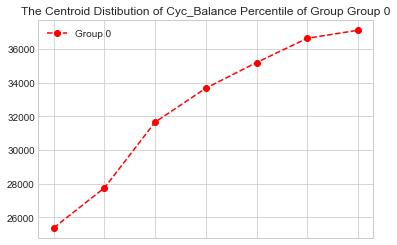

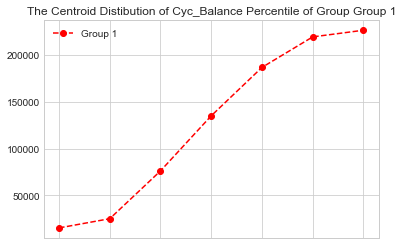

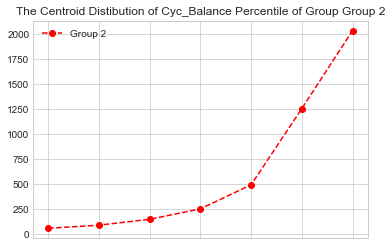

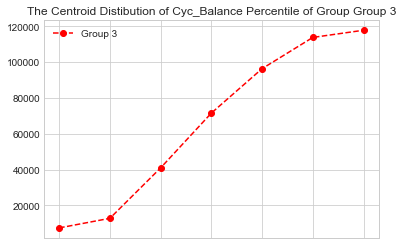

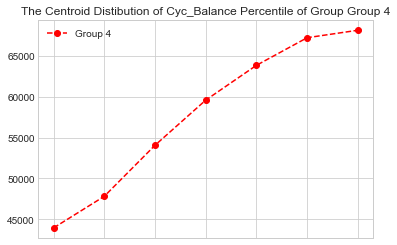

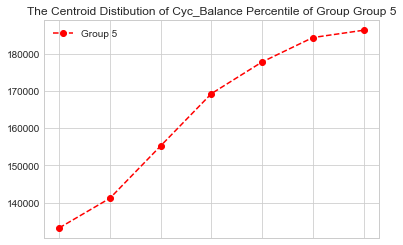

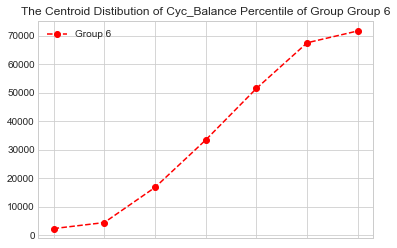

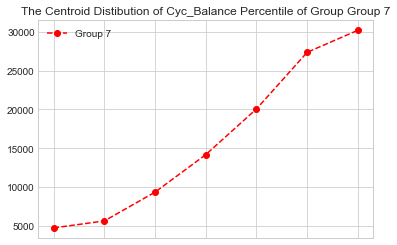

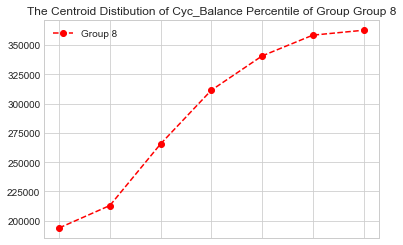

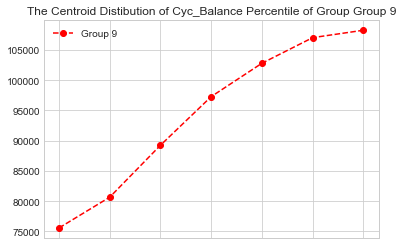

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot()
group = ['Group 0','Group 1','Group 2','Group 3','Group 4','Group 5','Group 6','Group 7','Group 8','Group 9']
for a in group:
    ploting.plot(kind='line' ,color = 'r' ,use_index = True ,y = a ,title = 'The Centroid Distibution of Cyc_Balance Percentile of Group ' + a ,marker='o' ,linestyle='dashed' ,ax = ax )
plt.show()


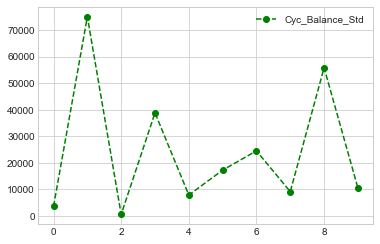

In [17]:
Std_Centroids.plot(kind='line' ,color = 'g' ,use_index = True ,y = 'Cyc_Balance_Std' ,marker='o' ,linestyle='dashed')

In [18]:
b_ac_data.sort_values(['Cyc_Balance_Mean_Score'])

,CUSTOMER_ID,DOB,Gender,MONTHLY_INCOME_RL,Marital_status,Mobilephone_fg,Officephone_fg,Homephone_fg,NO_OF_CHILD,Occupation,Province,Zipcode,Total_Credit_Limit,Customer_Status,Is_Staff,Is_KTC_Credit_Card_Holder,Age,Account_Number,Account_Status,Account_Type,Open_Date,Credit_Limit,Current_Balance,Card_Age,CARD_NO,CyC_Balance_Size,CyC_Balance_Min,CyC_Balance_Max,CyC_Balance_Mean,Cyc_Balance_Std,Cyc_Balance_PT_5,Cyc_Balance_PT_25,Cyc_Balance_PT_50,Cyc_Balance_PT_75,Cyc_Balance_PT_95,CyC_Balance_Min_Score,Cyc_Balance_PT_5_Score,Cyc_Balance_PT_25_Score,Cyc_Balance_PT_50_Score,Cyc_Balance_PT_75_Score,Cyc_Balance_PT_95_Score,Cyc_Balance_PT_Max_Score,Cyc_Balance_Mean_Score,Cyc_Balance_Grade,Cyc_Balance_Behavier_Group
179131,1000000002244058,19550619,Male,48081.00000,Married,Y,Y,Y,0,Permanent Employee,Bangkok,10130,0,Inactive,N,N,64,4216680000909623,Normal,Revolving Loan Card,20070705,200000.0,121174.39,12,4216680006484407,24.0,-382870.00,-382870.00,-3.828700e+05,0.000000,-3.828700e+05,-3.828700e+05,-382870.000,-3.828700e+05,-3.828700e+05,-15.326168,-14.771812,-13.054297,-11.484008,-10.375406,-9.610008,-9.401589,-12.003327,100.000000,2
63758,1000000000823425,19750826,Male,32000.00000,Single,Y,Y,Y,0,Other,Bangkok,10310,0,Active,N,Y,44,4216680000707132,Normal,Revolving Loan Card,20060904,160000.0,149559.62,13,4216680002739549,3.0,-319993.24,-12438.31,-1.717096e+05,154071.592906,-3.062636e+05,-2.513453e+05,-182697.310,-9.756781e+04,-2.946421e+04,-12.898222,-11.932738,-8.800267,-5.863343,-3.227110,-1.502174,-1.119745,-6.477657,90.723461,2
56655,1000000000736753,19750210,Female,53000.00000,Single,Y,Y,Y,0,Other,Bangkok,10520,0,Inactive,N,Y,44,4216680001116992,Normal,Revolving Loan Card,20100623,100000.0,-120900.27,9,4216680007362982,24.0,-361321.35,-123.71,-8.474645e+04,103116.606896,-2.214805e+05,-1.582560e+05,-14107.335,-1.842130e+03,-5.523565e+02,-14.494081,-8.790627,-5.789390,-1.129492,-0.828687,-0.838878,-0.844424,-4.673654,87.694886,2
598740,3809761,19770528,Male,72000.00000,Married,Y,Y,Y,0,Permanent Employee,Chacherngsao,24130,0,Inactive,N,Y,42,4216680000410029,Normal,Revolving Loan Card,20160323,180000.0,-146780.53,3,4216680015127930,24.0,-146780.53,-39053.53,-9.513466e+04,34301.731098,-1.460455e+05,-1.235055e+05,-95330.530,-6.715553e+04,-4.467538e+04,-6.209723,-5.994965,-4.665423,-3.410164,-2.465125,-1.851149,-1.714789,-3.758763,86.158959,2
50812,1000000000672103,19740107,Male,23333.00000,Single,Y,N,N,0,Permanent Employee,Pathum Thani,12110,0,Active,N,Y,45,4216680001269517,Normal,Revolving Loan Card,20110905,116600.0,-3.66,8,4216680009474215,24.0,-430049.21,35396.78,-9.814892e+03,90185.780910,-5.529227e+03,-1.504750e+01,2454.755,1.420244e+04,2.834132e+04,-17.147963,-0.787353,-0.671252,-0.664444,-0.426687,-0.176000,-0.050283,-2.846283,84.627081,2
414670,3164008,19910904,Male,56004.00000,Single,Y,Y,Y,0,Doctor / Dentist,Narathiwat,96000,0,Active,N,Y,28,4216680000135830,Normal,Revolving Loan Card,20161006,200000.0,-12.50,3,4216680017002644,6.0,-205604.26,-0.50,-3.430010e+04,83921.565061,-1.542256e+05,-8.955000e+01,-51.025,-6.320000e+00,-1.440000e+00,-8.481164,-6.298123,-0.673662,-0.734804,-0.782690,-0.826239,-0.841669,-2.662622,84.318748,2
440346,3265176,19770505,Female,40170.00000,Single,Y,Y,Y,0,Permanent Employee,Ayutthya,13160,0,Inactive,N,Y,42,4216680000176246,Normal,Revolving Loan Card,20140529,80000.0,-61752.62,5,4216680012005212,24.0,-61752.62,-61752.62,-6.175262e+04,0.000000,-6.175262e+04,-6.175262e+04,-61752.620,-6.175262e+04,-6.175262e+04,-2.926424,-2.871023,-2.668090,-2.467328,-2.329754,-2.242935,-2.222279,-2.532547,84.100379,2
35664,1000000000501656,19620503,Male,40515.00000,Married,Y,Y,Y,0,Permanent Employee,Suphanburi,72000,0,Active,N,Y,57,4216680001218101,Deactivate Card,Revolving Loan Card,20110418,100000.0,51419.91,8,4216680012083003,3.0,-57965.76,-57965.76,-5.796576e+04,0.000000,-5.796576e+04,-5.796576e+04,-57965.760,-5.796576e+04,-5.796576e+04,-2.780197,-2.730680,-2.545608,-2.360996,-2.234874,-2.156056,-2.137615,-2.420